#### Allowed packages: Pandas, matplotlib, seaborn, and numpy. Sklearn is allowed only for getting the dataset.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from helper import *
import matplotlib.pyplot as plt

# some data processing and feature analysis

<li> load boston house dataset </li>
<li> split train and test with ratio 1 to 3 </li>
<li> plot the target value based on 13 different features and recognize the correlation between features and
the target values. talk about them and their meanings.</li>

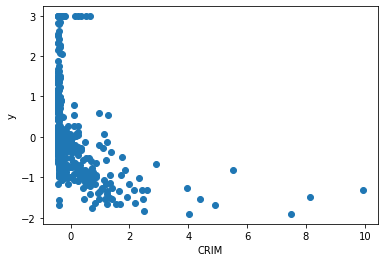

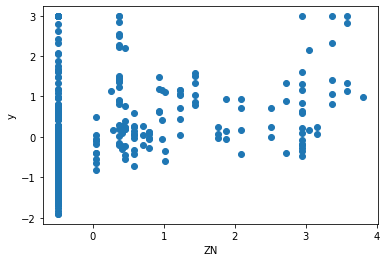

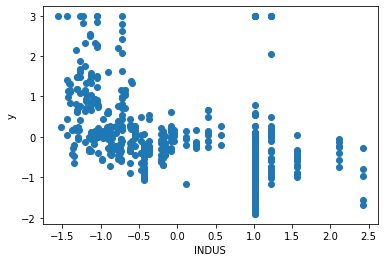

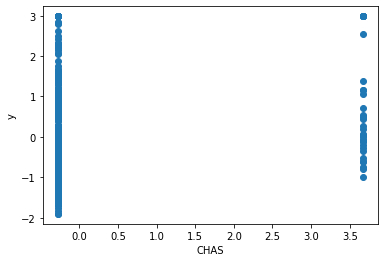

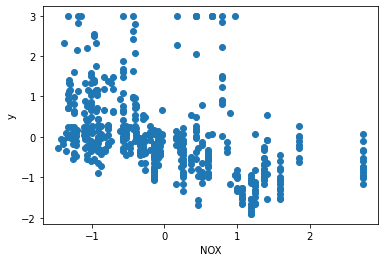

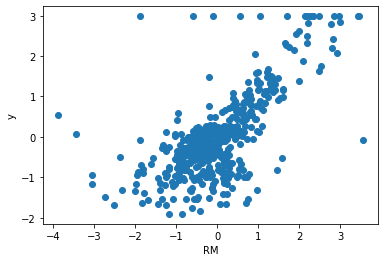

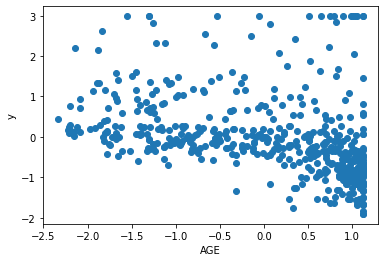

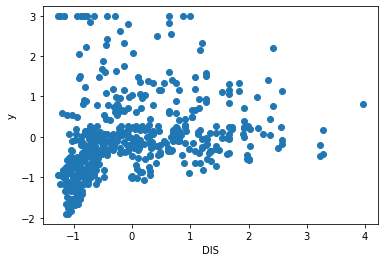

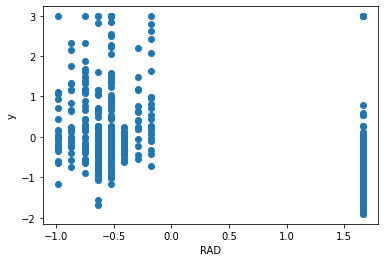

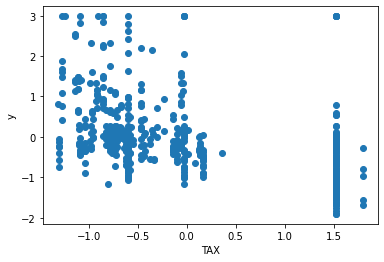

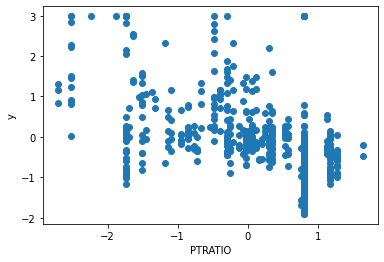

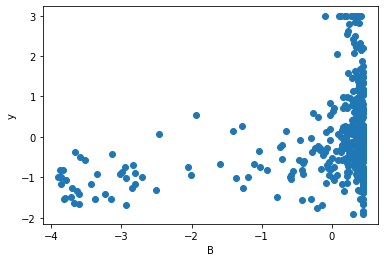

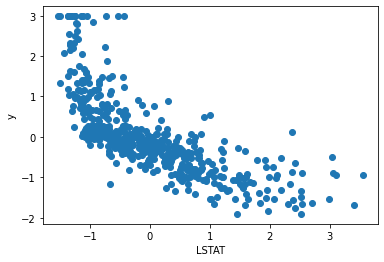

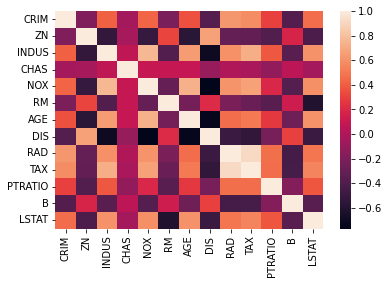

In [6]:
data,X,y = get_data_normalized()
X_train, X_test, y_train, y_test = split_data(X,y,0.25)
for feature in X.columns:
    plt.scatter(X[feature],y)
    plt.xlabel(feature)
    plt.ylabel('y')
    plt.show()

corr = X.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

## close form of Linear Regression
Minimize 
$$
\frac{1}{2} (Y-\phi W)^T(Y-\phi W) + \frac{1}{2} \lambda W^TW
$$
<li> 1-write down close form of linear regression </li>
<li> 2-now use this close form to obtain good weight for this problem </li>
<li> 3-Plot the target value and the predicted value based on ‘LSTAT’, ‘DIS’, and any other
features so that you can see how the distributions vary</li>
<li> 4-plot regularization - weights_norm with lambda between 0 to 0.1 with step 0.005 </li>
<li> 5-plot regularization - test_error with lambda between 0 to 0.1 with step 0.005 </li>
<li> 6-explain effect of regularization </li>
<li> 7-add square of each feature to data set and repeat 4,5,6</li>
<li> 8-add square and power of three of each feature to data set and repeat 4,5,6</li>
<li> compare part $7^{th}$ test error and previous one <b>explain how 7 and 8 are helping model to do better work </li>
    


1- $W = (X^T X + \lambda I)^{-1} X^T y $

#### 6-Regularization reduce overfitting because it causes the model to have smaller W and not overfit on one or more feature also it reduce the - + - ... state with big W but if our model is naive and not complex enought and it underfits adding regularization doesnt help and may cause even more underfitting

#### 8-as we can see from the results(below) adding more complex features + regularization works very well (because we have a complex model and we use regularization to stop the model from overfitting) (the model in 7 works best)

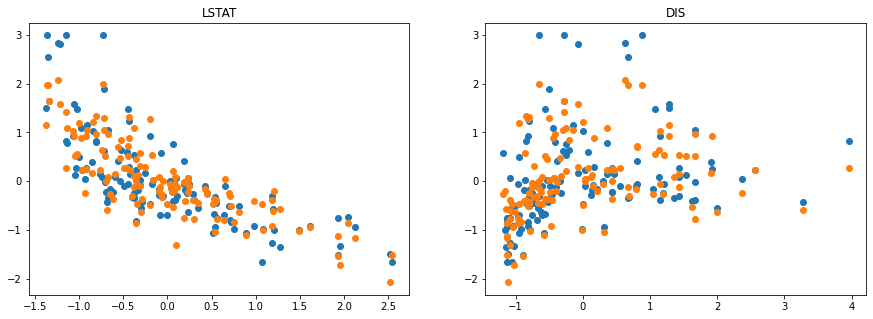

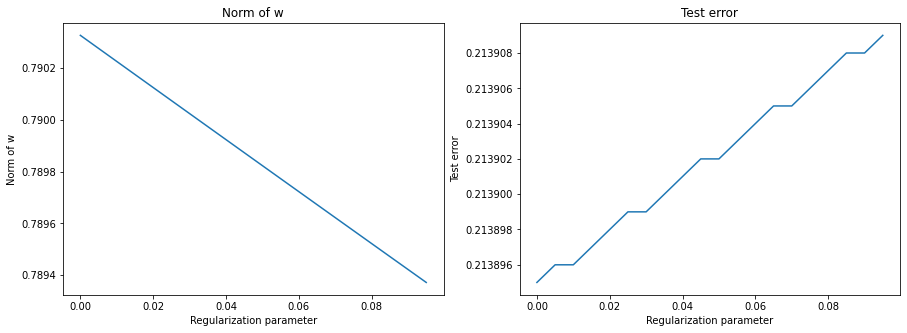

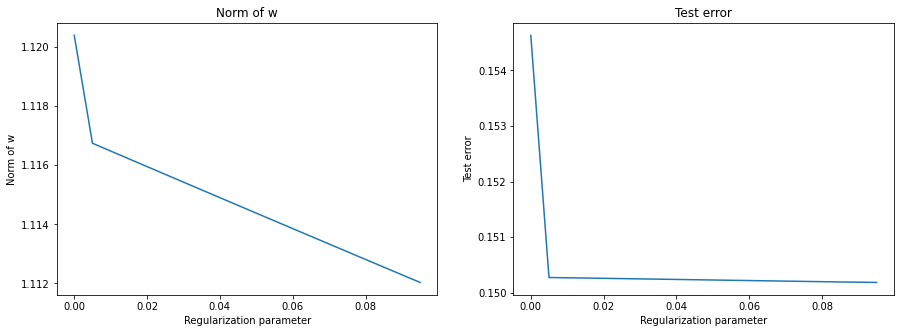

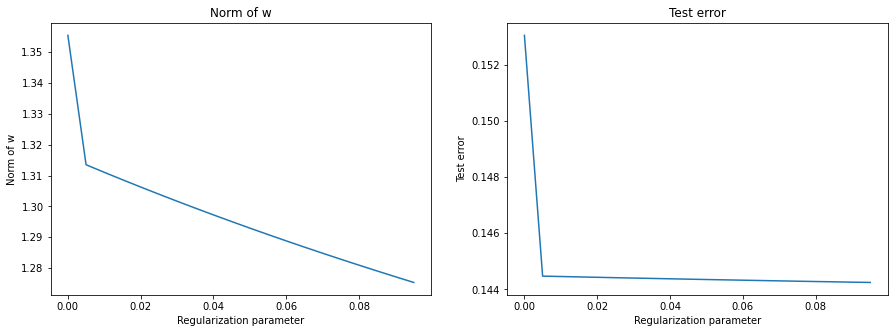

In [12]:
#this is just template you are free to implement is however you want. add many cell as you wish
class LinearRegressionModel: #phi is phi = lambda X : np.c_[np.ones(X.shape[0]),X] for adding bias term to data or 
    # any other features to data (this is just suggestion you are free to do whatever you want.)
    def __init__(self,phi):
        self.phi = phi    
        self.w = None
        

    def fit(self,X,y,regularization):
        """
        get X and y train and learn the parameter by the equation.
    
        # """
        gram = self.phi(X).T.dot(self.phi(X))
        w = np.linalg.inv(gram + regularization * np.identity(gram.shape[0])).dot(self.phi(X).T).dot(y)
        self.w = w

    def evaluate(self,X,y):
        """
        get X and y and calculate error.
        """
        y_pred = self.phi(X).dot(self.w)
        return np.mean((y_pred - y)**2)

    def transform(self,X):
        """
        get X and calculate yhat as predicted values.
    
        """
        return self.phi(X).dot(self.w)
    
    def get_param(self):
        "return w "
        return self.w

if (type(X_train) is not np.ndarray):
    X_train = pd.DataFrame.to_numpy(X_train)
    y_train = pd.Index.to_numpy(y_train)
    X_test = pd.DataFrame.to_numpy(X_test)
    y_test = pd.Index.to_numpy(y_test)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
phi = lambda X : np.c_[np.ones(X.shape[0]),X]
model = LinearRegressionModel(phi)
model.fit(X_train,y_train,0.001)
#Plots
idx1 = data.columns.get_loc("LSTAT")
idx2 = data.columns.get_loc("DIS")
axs[0].scatter(X_test[:,idx1],y_test)
axs[0].scatter(X_test[:,idx1],model.transform(X_test))
axs[0].set_title("LSTAT")


axs[1].scatter(X_test[:,idx2],y_test)
axs[1].scatter(X_test[:,idx2],model.transform(X_test))
axs[1].set_title("DIS")

plt.show()
#step 4, 5, 6 function
def magical_function(phi):

    #Plotting the regularization parameter
    norms = []
    test_errors = []
    reg = np.arange(0.0000, 0.1, 0.005)
    for r in reg:
        model = LinearRegressionModel(phi)
        model.fit(X_train,y_train,r)
        norms.append(np.linalg.norm(model.get_param()))
        test_errors.append(np.round(model.evaluate(X_test,y_test), 6))
    #Plots
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].plot(reg,norms)
    axs[0].set_title("Norm of w")
    axs[0].set_xlabel("Regularization parameter")
    axs[0].set_ylabel("Norm of w")

    axs[1].plot(reg,test_errors)
    axs[1].set_title("Test error")
    axs[1].set_xlabel("Regularization parameter")
    axs[1].set_ylabel("Test error")
    plt.show()

phi = lambda X : np.c_[np.ones(X.shape[0]),X]
magical_function(phi)

#َAdd Square of Features
phi = lambda X : np.c_[np.ones(X.shape[0]),X,X**2]
magical_function(phi)

#Add Square and power 3 of Features
phi = lambda X : np.c_[np.ones(X.shape[0]),X,X**2,X**3]
magical_function(phi)


#### The analysis of results is above its also worth noting that the max error in (x, x^2, x^3) is 0.152 where as in (x, x^2) is 0.21 and in (x) (original dataset) is 0.192  This Shows the effect of regularization

# gradient descent with best learning rate

Minimize 
$$
\frac{1}{2} (Y-\phi W)^T(Y-\phi W) + \frac{1}{2} \lambda W^TW
$$
<li> 1-write down gradient descent update formulation </li>
<li> 2-use hessian matrix to obtain learning rate instead of manually set it. for better underestanding read about newton raphson method</li>
<li> 3-Plot the target value and the predicted value based on ‘LSTAT’, ‘DIS’, and any other
features so that you can see how the distributions vary</li>
<li> 4-plot regularization - weights_norm with lambda between 0 to 10 with step 0.1 </li>
<li> 5-plot regularization - test_error with lambda between 0 to 10 with step 0.1 </li>
<li> 6-explain effect of regularization </li>
<li> 7-add square of each feature to data set and repeat 4,5,6</li>
<li> 8-add square and power of three of each feature to data set and repeat 4,5,6</li>
<li> compare part $7^{th}$ test error and previous one <b>explain how 7 and 8 are helping model to do better work </li>
    

$x \leftarrow x - H^{-1} \nabla f(x)$

In [10]:
data,X,y = get_data_normalized()
X_train, X_test, y_train, y_test = split_data(X,y,0.25)

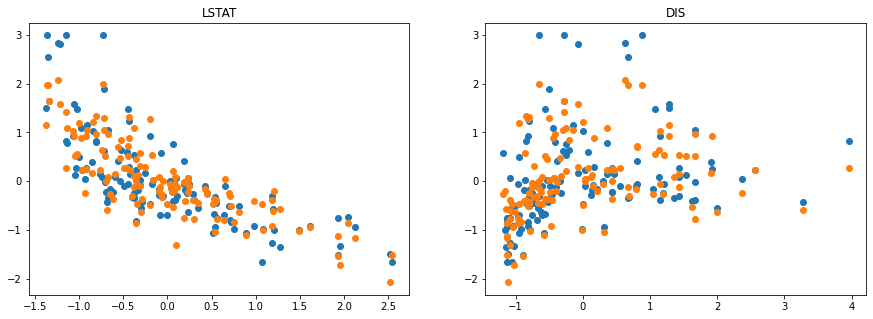

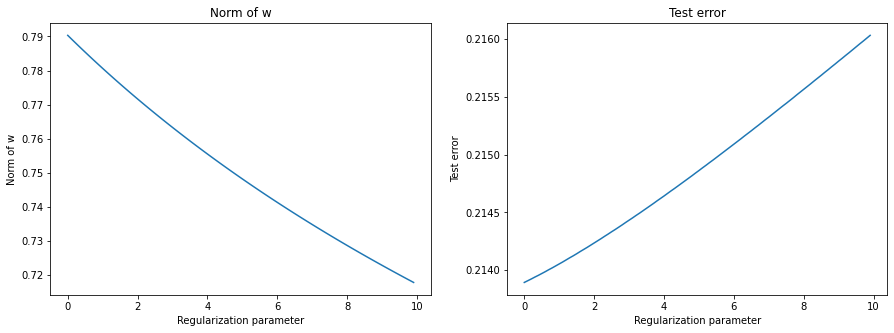

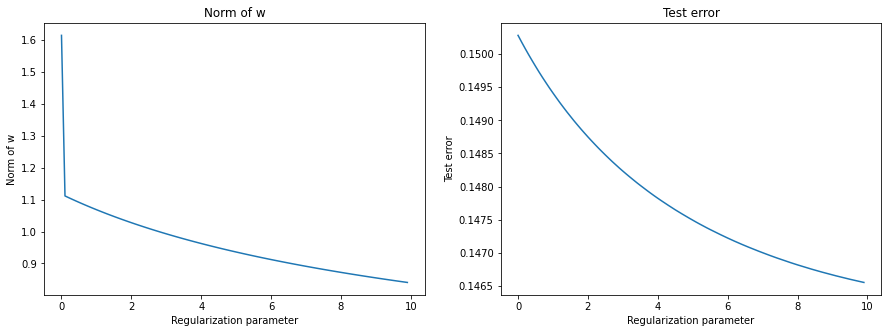

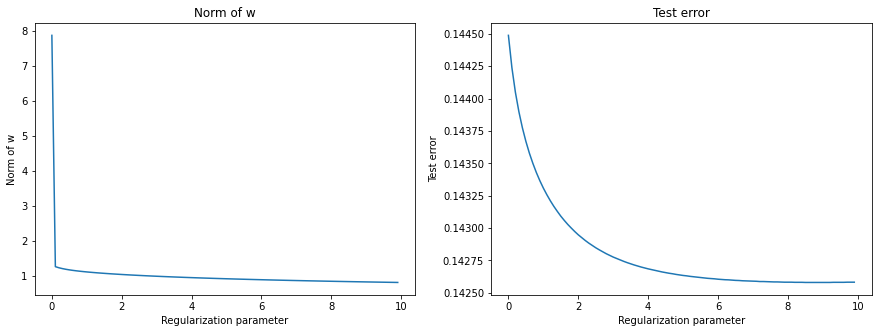

In [11]:
#this is just template you are free to implement is however you want.
class LinearRegressionModel:#phi is phi = lambda X : np.c_[np.ones(X.shape[0]),X] for adding bias term to data or 
    # any other features to data (this is just suggestion you are free to do whatever you want.)
    def __init__(self,phi):
        self.phi = phi
        self.w = None
    
    def fit(self,X,y,regularization,steps=100):
        """
        get X and y train and learn the parameter by the gradient descent.
    
        """
        w = np.random.rand(phi(X).shape[1])
        for i in range(steps):
            Hessian = self.phi(X).T.dot(self.phi(X)) + regularization * np.identity(self.phi(X).shape[1])
            grad = self.phi(X).T.dot(self.phi(X).dot(w) - y) + regularization * w
            #print(Hessian.shape)
            #print(grad.shape)
            w = w - np.linalg.inv(Hessian).dot(grad)
        self.w = w
    def evaluate(self,X,y):
        """
        get X and y and calculate error.
        """
        y_pred = self.phi(X).dot(self.w)
        return np.mean((y_pred - y)**2)

    def transform(self,X):
        """
        get X and calculate Phi(X)W as predicted values.
    
        """
        return self.phi(X).dot(self.w)
    
    def get_param(self):
        "return w "
        return self.w


if (type(X_train) is not np.ndarray):
    X_train = pd.DataFrame.to_numpy(X_train)
    y_train = pd.Index.to_numpy(y_train)
    X_test = pd.DataFrame.to_numpy(X_test)
    y_test = pd.Index.to_numpy(y_test)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
phi = lambda X : np.c_[np.ones(X.shape[0]),X]
model = LinearRegressionModel(phi)
model.fit(X_train,y_train,0.01)
#Plots
idx1 = data.columns.get_loc("LSTAT")
idx2 = data.columns.get_loc("DIS")
axs[0].scatter(X_test[:,idx1],y_test)
axs[0].scatter(X_test[:,idx1],model.transform(X_test))
axs[0].set_title("LSTAT")


axs[1].scatter(X_test[:,idx2],y_test)
axs[1].scatter(X_test[:,idx2],model.transform(X_test))
axs[1].set_title("DIS")

def magical_function(phi):

    #Plotting the regularization parameter
    norms = []
    test_errors = []
    reg = np.arange(0.00, 10, 0.1)
    for r in reg:
        model = LinearRegressionModel(phi)
        model.fit(X_train,y_train,r)
        norms.append(np.linalg.norm(model.get_param()))
        test_errors.append(np.round(model.evaluate(X_test,y_test), 6))
    #Plots
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].plot(reg,norms)
    axs[0].set_title("Norm of w")
    axs[0].set_xlabel("Regularization parameter")
    axs[0].set_ylabel("Norm of w")

    axs[1].plot(reg,test_errors)
    axs[1].set_title("Test error")
    axs[1].set_xlabel("Regularization parameter")
    axs[1].set_ylabel("Test error")
    plt.show()


phi = lambda X : np.c_[np.ones(X.shape[0]),X]
magical_function(phi)

#َAdd Square of Features
phi = lambda X : np.c_[np.ones(X.shape[0]),X,X**2]
magical_function(phi)

#Add Square and power 3 of Features
phi = lambda X : np.c_[np.ones(X.shape[0]),X,X**2,X**3]
magical_function(phi)

#### 6-Regularization reduce overfitting because it causes the model to have smaller W and not overfit on one or more feature also it reduce the - + - ... state with big W But if model underfits adding regularization will not help as we can see in our first model

#### 8-as we can see from the results(below) adding more complex features + regularization works very well (because we have a complex model and we use regularization to stop the model from overfitting) (the model in 8 works best)